# Importing, Loading, Descriptions and Preliminary Insights

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

sns.set_palette("pastel")

### Loading, head and shape

Scraped rent stress features from QuickStats ABS by Statistical Areas Level 1 

(See Part 1 and 2 to see how it was scraped)

In [ ]:
# Import csv from raw.githubuserconent.com
!wget "https://raw.githubusercontent.com/Ferrariagustinpablo/csvs/main/Rent%20Stress%20-%20ABS%20scraped%20data%20(SA1)%20NSW%20Dataset%20March%202023.csv"

--2023-03-22 00:17:24--  https://raw.githubusercontent.com/Ferrariagustinpablo/csvs/main/Rent%20Stress%20-%20ABS%20scraped%20data%20(SA1)%20NSW%20Dataset%20March%202023.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8579126 (8.2M) [text/plain]
Saving to: ‘Rent Stress - ABS scraped data (SA1) NSW Dataset March 2023.csv.5’

Rent Stress - ABS s 100%[===================>]   8.18M  --.-KB/s    in 0.1s    

2023-03-22 00:17:24 (84.8 MB/s) - ‘Rent Stress - ABS scraped data (SA1) NSW Dataset March 2023.csv.5’ saved [8579126/8579126]



In [ ]:
# Read dataset with pandas
df = pd.read_csv(r"/content/Rent Stress - ABS scraped data (SA1) NSW Dataset March 2023.csv")

# Display shape and head
print("This dataset shape is:", df.shape)
df.head()

This dataset shape is: (19123, 83)


,Unnamed: 0,People,Female,Median age,All private dwellings,Average number of people per household,Median weekly household income,Median monthly mortgage repayments,Median weekly rent (b),Average number of motor vehicles per dwelling,...,Did not go to work,Worked at home,People who travelled to work by public transport (a),People who travelled to work by car as driver or passenger (b),SA1 Code,Area sqkm,Region,State,SA4_NAME_2016,Density
0,0,526.0,48.5%,38,162,3.2,"$1,818","$1,517",$425,1.8,...,18.5,22.3,7.1,54.3,11603131923,0.2924,Greater Sydney,New South Wales,Sydney - Blacktown,1798.905609
1,1,433.0,55.1%,32,138,3.2,"$1,671","$1,733",$435,2.0,...,NaN,24.0,NaN,1.8,11603131924,0.2283,Greater Sydney,New South Wales,Sydney - Blacktown,1896.627245
2,2,435.0,48.9%,32,135,3.4,"$2,017","$2,000",$370,2.1,...,1.8,NaN,20.8,NaN,11603131925,0.1143,Greater Sydney,New South Wales,Sydney - Blacktown,3805.774278
3,3,546.0,61.8%,71,83,3.6,"$2,399","$2,500",$400,2.3,...,2.6,NaN,38.4,NaN,11603131926,0.1343,Greater Sydney,New South Wales,Sydney - Blacktown,4065.524944
4,4,438.0,48.6%,32,122,3.6,"$2,394","$2,392",$530,2.5,...,14.6,27.7,0.0,52.6,11603131927,0.9117,Greater Sydney,New South Wales,Sydney - Blacktown,480.421191


### State NSW

In [ ]:
# Check if the data is only for NSW as the business requirements is only for this State

if [df["State"] == "New South Wales"]:
  print("Only zones from NSW")

Only zones from NSW


In [ ]:
# Drop 'Unnamed: 0' as it is only and id
df = df.drop(columns=['Unnamed: 0'], axis=1)


### Importing data of Community housing and Public housing from Table Builder 2021 ABS Census data

In [ ]:
# Import data in Github
!wget "https://raw.githubusercontent.com/Ferrariagustinpablo/csvs/main/TENLLD%20SA1%20Cleaned%20csv.csv"

--2023-03-22 00:17:25--  https://raw.githubusercontent.com/Ferrariagustinpablo/csvs/main/TENLLD%20SA1%20Cleaned%20csv.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1195203 (1.1M) [text/plain]
Saving to: ‘TENLLD SA1 Cleaned csv.csv.5’

TENLLD SA1 Cleaned  100%[===================>]   1.14M  --.-KB/s    in 0.05s   

2023-03-22 00:17:25 (21.4 MB/s) - ‘TENLLD SA1 Cleaned csv.csv.5’ saved [1195203/1195203]



In [ ]:
# Read Public housing dataset
ph = pd.read_csv(r"/content/TENLLD SA1 Cleaned csv.csv")

# Display shape and head
print("This dataset shape is:", ph.shape)
ph.head()

This dataset shape is: (61835, 4)


,SA1 CODE,Rented: Community housing provider,Rented: State or territory housing authority,Total
0,10201102801,0,,0
1,10201102802,0,0,0
2,10201102803,0,0,0
3,10201102804,0,0,0
4,10201102805,0,0,0


In [ ]:
# Rename columns before merging
ph.columns = ['SA1 CODE', 'Rented: Community housing provider',
       'Rented: Public housing', 'Households rented CH or PH']


In [ ]:
# Merge Public housing columns into dataset
df = df.merge(ph, how="left", left_on="SA1 Code", right_on="SA1 CODE" ).drop("SA1 CODE",axis=1)
df.shape

(19123, 85)

### Info

In [ ]:
#Display the summary (info) of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19123 entries, 0 to 19122
Data columns (total 85 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   People                                                                                       19123 non-null  float64
 1   Female                                                                                       19123 non-null  object 
 2   Median age                                                                                   19123 non-null  int64  
 3   All private dwellings                                                                        19123 non-null  int64  
 4   Average number of people per household                                                       19123 non-null  float64
 5   Median weekly household income  

There are null values and some data types are not correctly classified

We will start dealing with the existent missing values

# Handling Missing values

### Identifying missing values

In [ ]:
# Quantify number of missing values in each column
null_series = df.isna().sum().sort_values(ascending=False)
null_series = null_series[null_series>0]

# Number of missing values in each column
print(null_series)

# Value counts. Many columns have the same number of null values
print("\nNum of missing values\n\n{}".format(null_series.value_counts()))

People who travelled to work by car as driver or passenger (b)    9300
Worked at home                                                    8716
People who travelled to work by public transport (a)              5579
Did not go to work                                                5579
Truck                                                             3524
                                                                  ... 
Father only born overseas                                          388
Both parents born overseas                                         388
No educational attainment                                          388
Year 9 or below                                                    388
Certificate level I                                                388
Length: 67, dtype: int64

Num of missing values

388     60
5579     2
9300     1
8716     1
3524     1
986      1
402      1
dtype: int64


### Visualising with msno library

<Axes: >

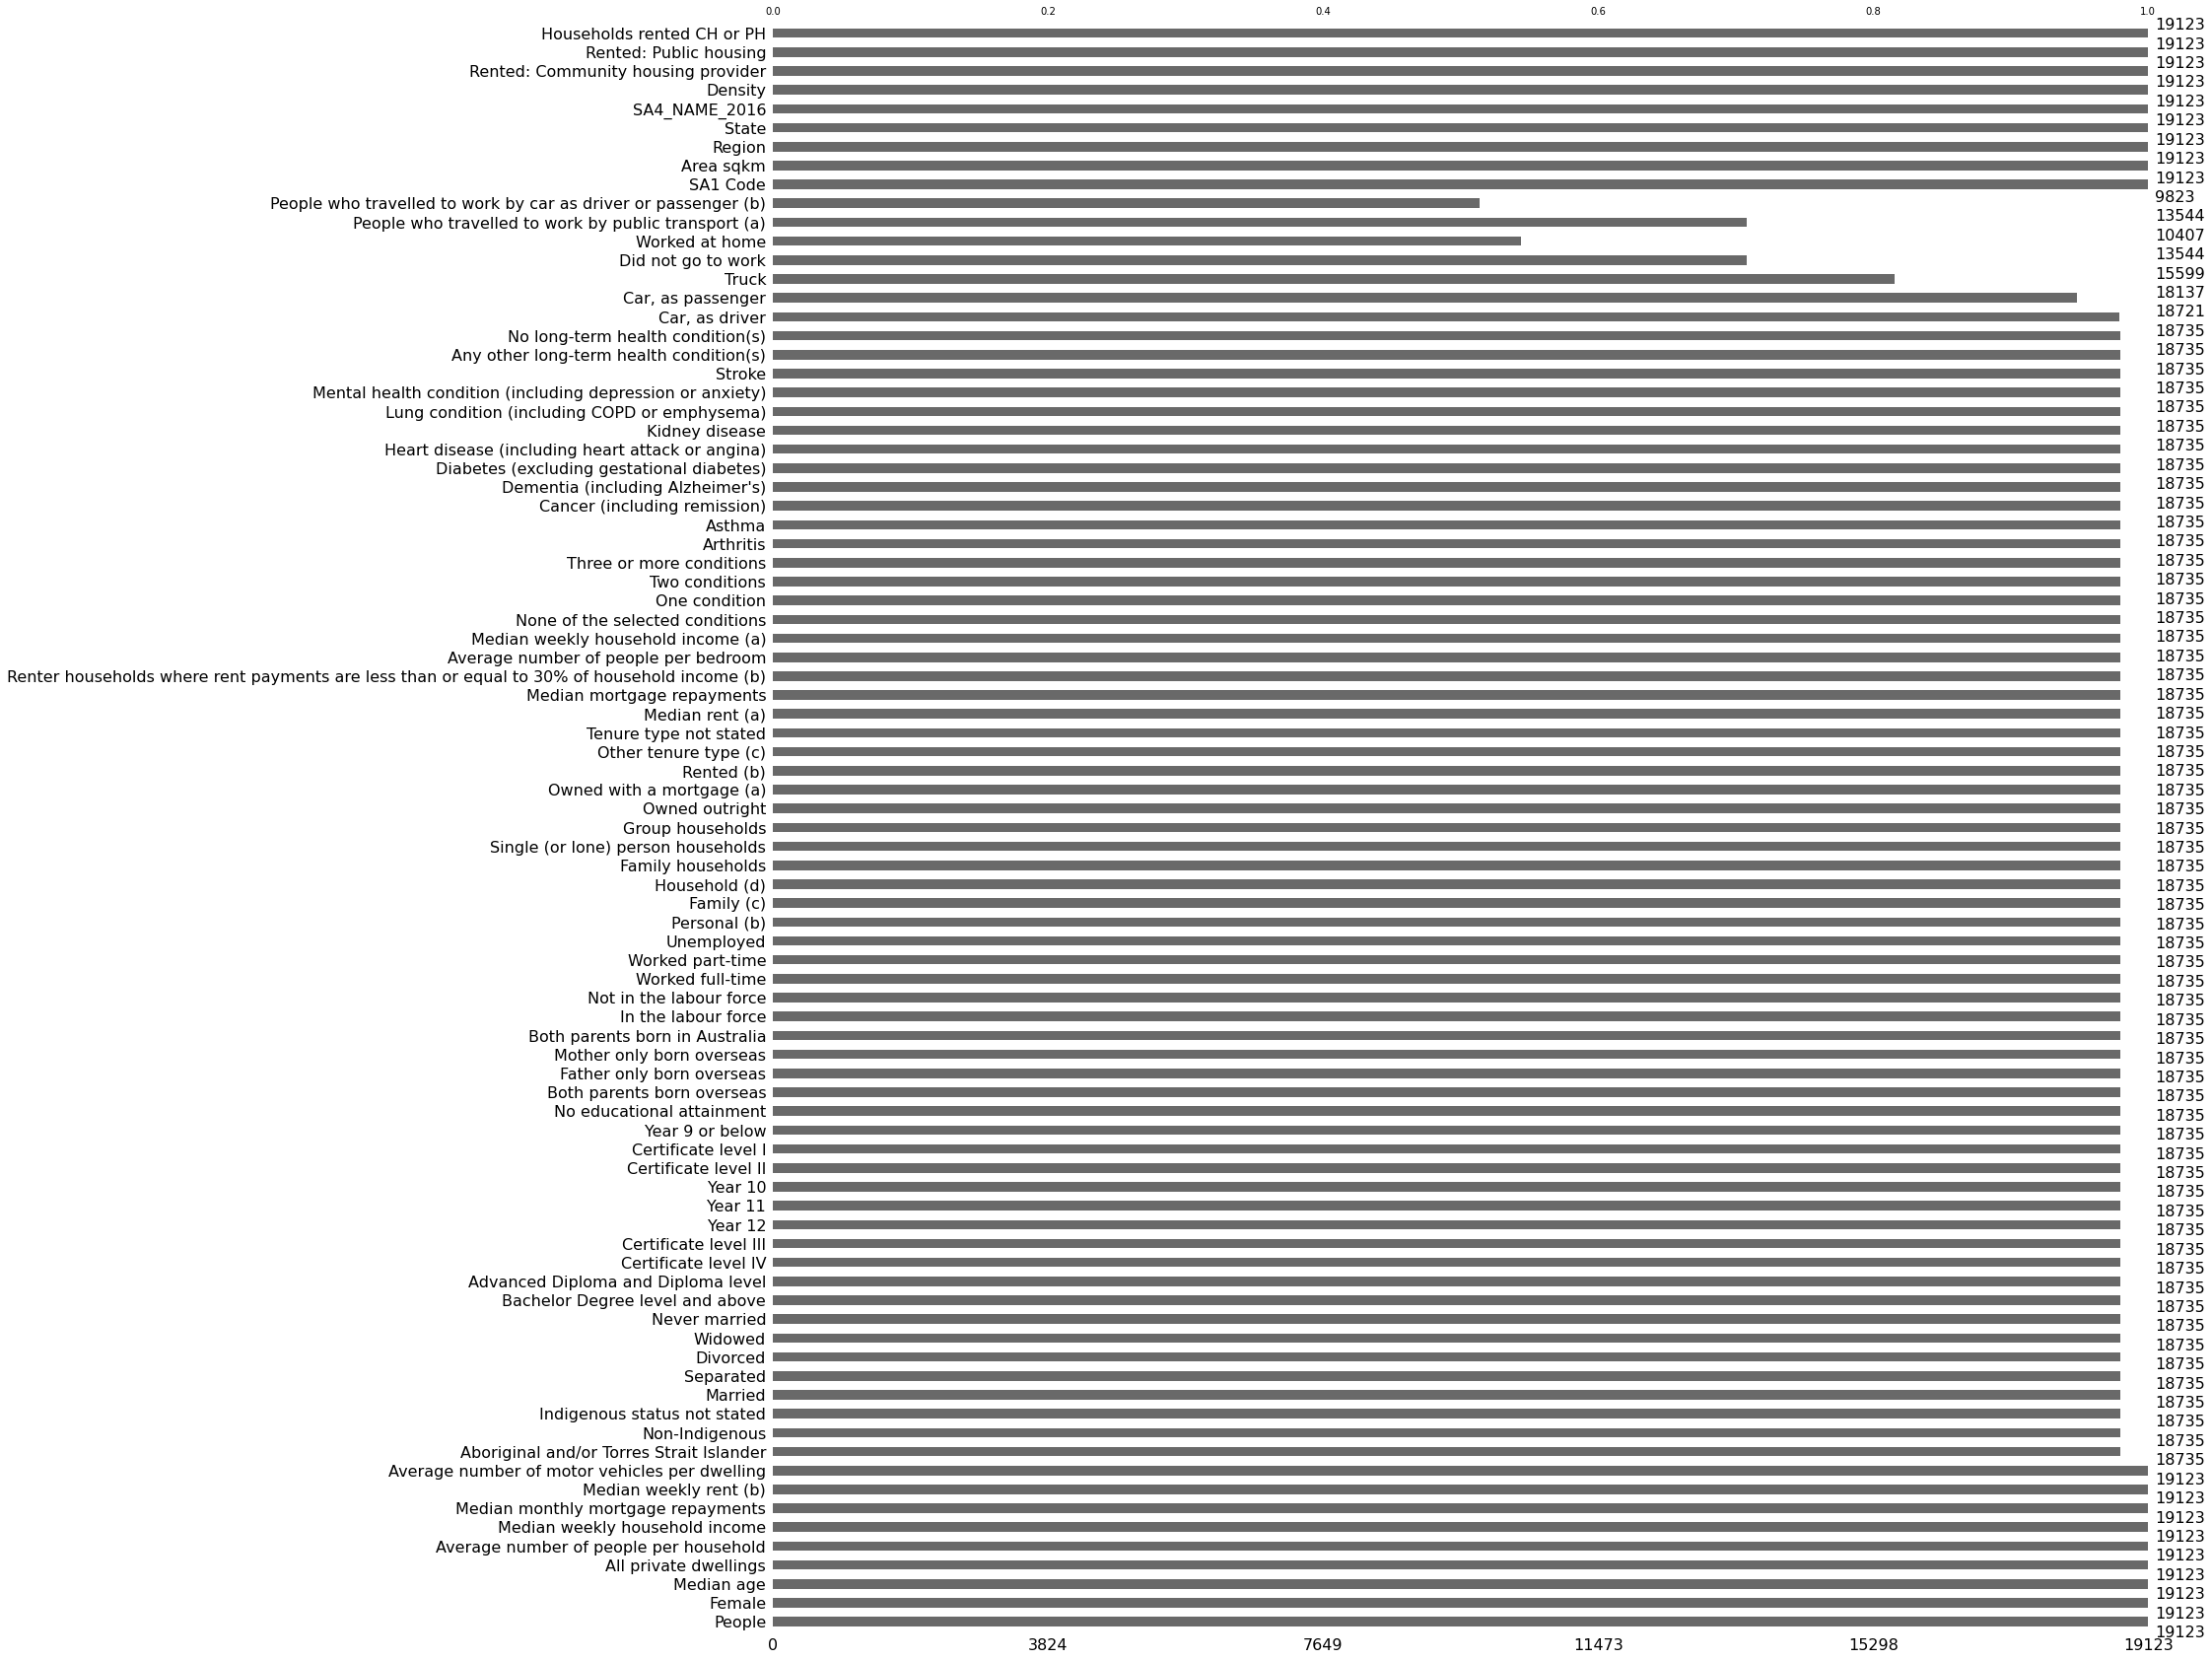

In [ ]:
# Visualise na values
msno.bar(df)

### Dropping and imputing

Visually we see that "Car, as passenger" only have few observations as nans as a percentage of total

We've decided to keep those rows to have more observations for the machine learning algorithm. Only for "Car, as passenger" column our team decided to impute median or mean


In [ ]:
# How many na values does "Car, as passenger" has?
print(df["Car, as passenger"].isna().sum())

# Set a threshold to select columns to drop
threshold_nas = df["Car, as passenger"].isna().sum()

986


In [ ]:
# Detect columns with more null values than the set threshold
list_col_drop = []

for column in df:
  if df[column].isna().sum() > threshold_nas:
    list_col_drop.append(column)

# List with columns with more nulls than threshold
print(list_col_drop)

# Drop columns from list
df = df.drop(columns=list_col_drop, axis=1)

# Display new shape
df.shape

['Truck', 'Did not go to work', 'Worked at home', 'People who travelled to work by public transport (a)', 'People who travelled to work by car as driver or passenger (b)']


(19123, 80)

Because the feature Car, as passenger may be useful for the model instead of dropping the column or dropping the observations row-wise, we decided to impute the median for those na values.


In [ ]:
# Display mean and median of "Car, as passenger" column
print(round(df["Car, as passenger"].mean(),1))
print(round(df["Car, as passenger"].median(),1))

5.4
4.6


The difference between median and mean may indicate right skewness on the variable distribution.

As next step we are plotting a histogram to check this characteristic.

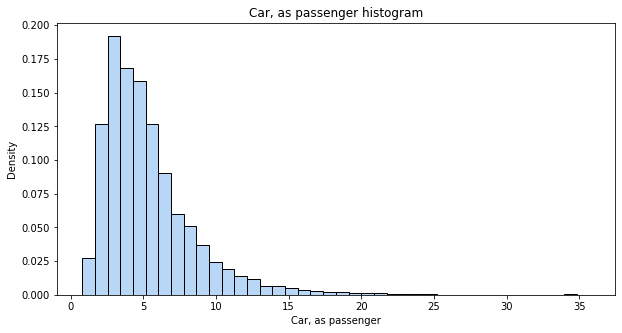

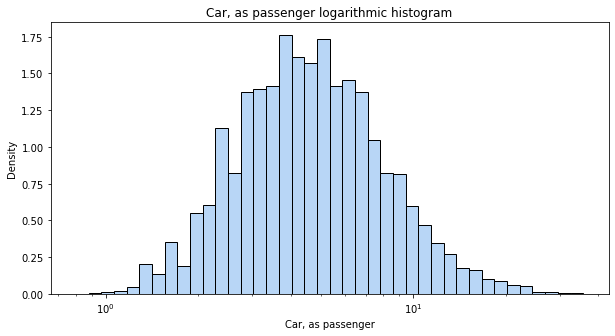

In [ ]:
# Figure size setting
fig, ax = plt.subplots(figsize=(10, 5))
 
# "Car, as passenger" histogram
sns.histplot(x="Car, as passenger", data=df, stat="density", ax=ax, bins=40)
plt.title("Car, as passenger histogram")
plt.show()

# "Car, as passenger" with logarithmic transformation

# Figure size setting
fig, ax = plt.subplots(figsize=(10, 5))

# logarithmic "Car, as passenger" histogram
sns.histplot(x="Car, as passenger", data=df, stat="density", ax=ax, bins=40, log_scale=True)
plt.title("Car, as passenger logarithmic histogram")
plt.show()



As it is right skewed we impute with median not mean.

The skeweness of this distributions would may lead us to think we should use the log of "Car, as passenger" for machine learning purposes.

Axes(0.125,0.125;0.775x0.755)


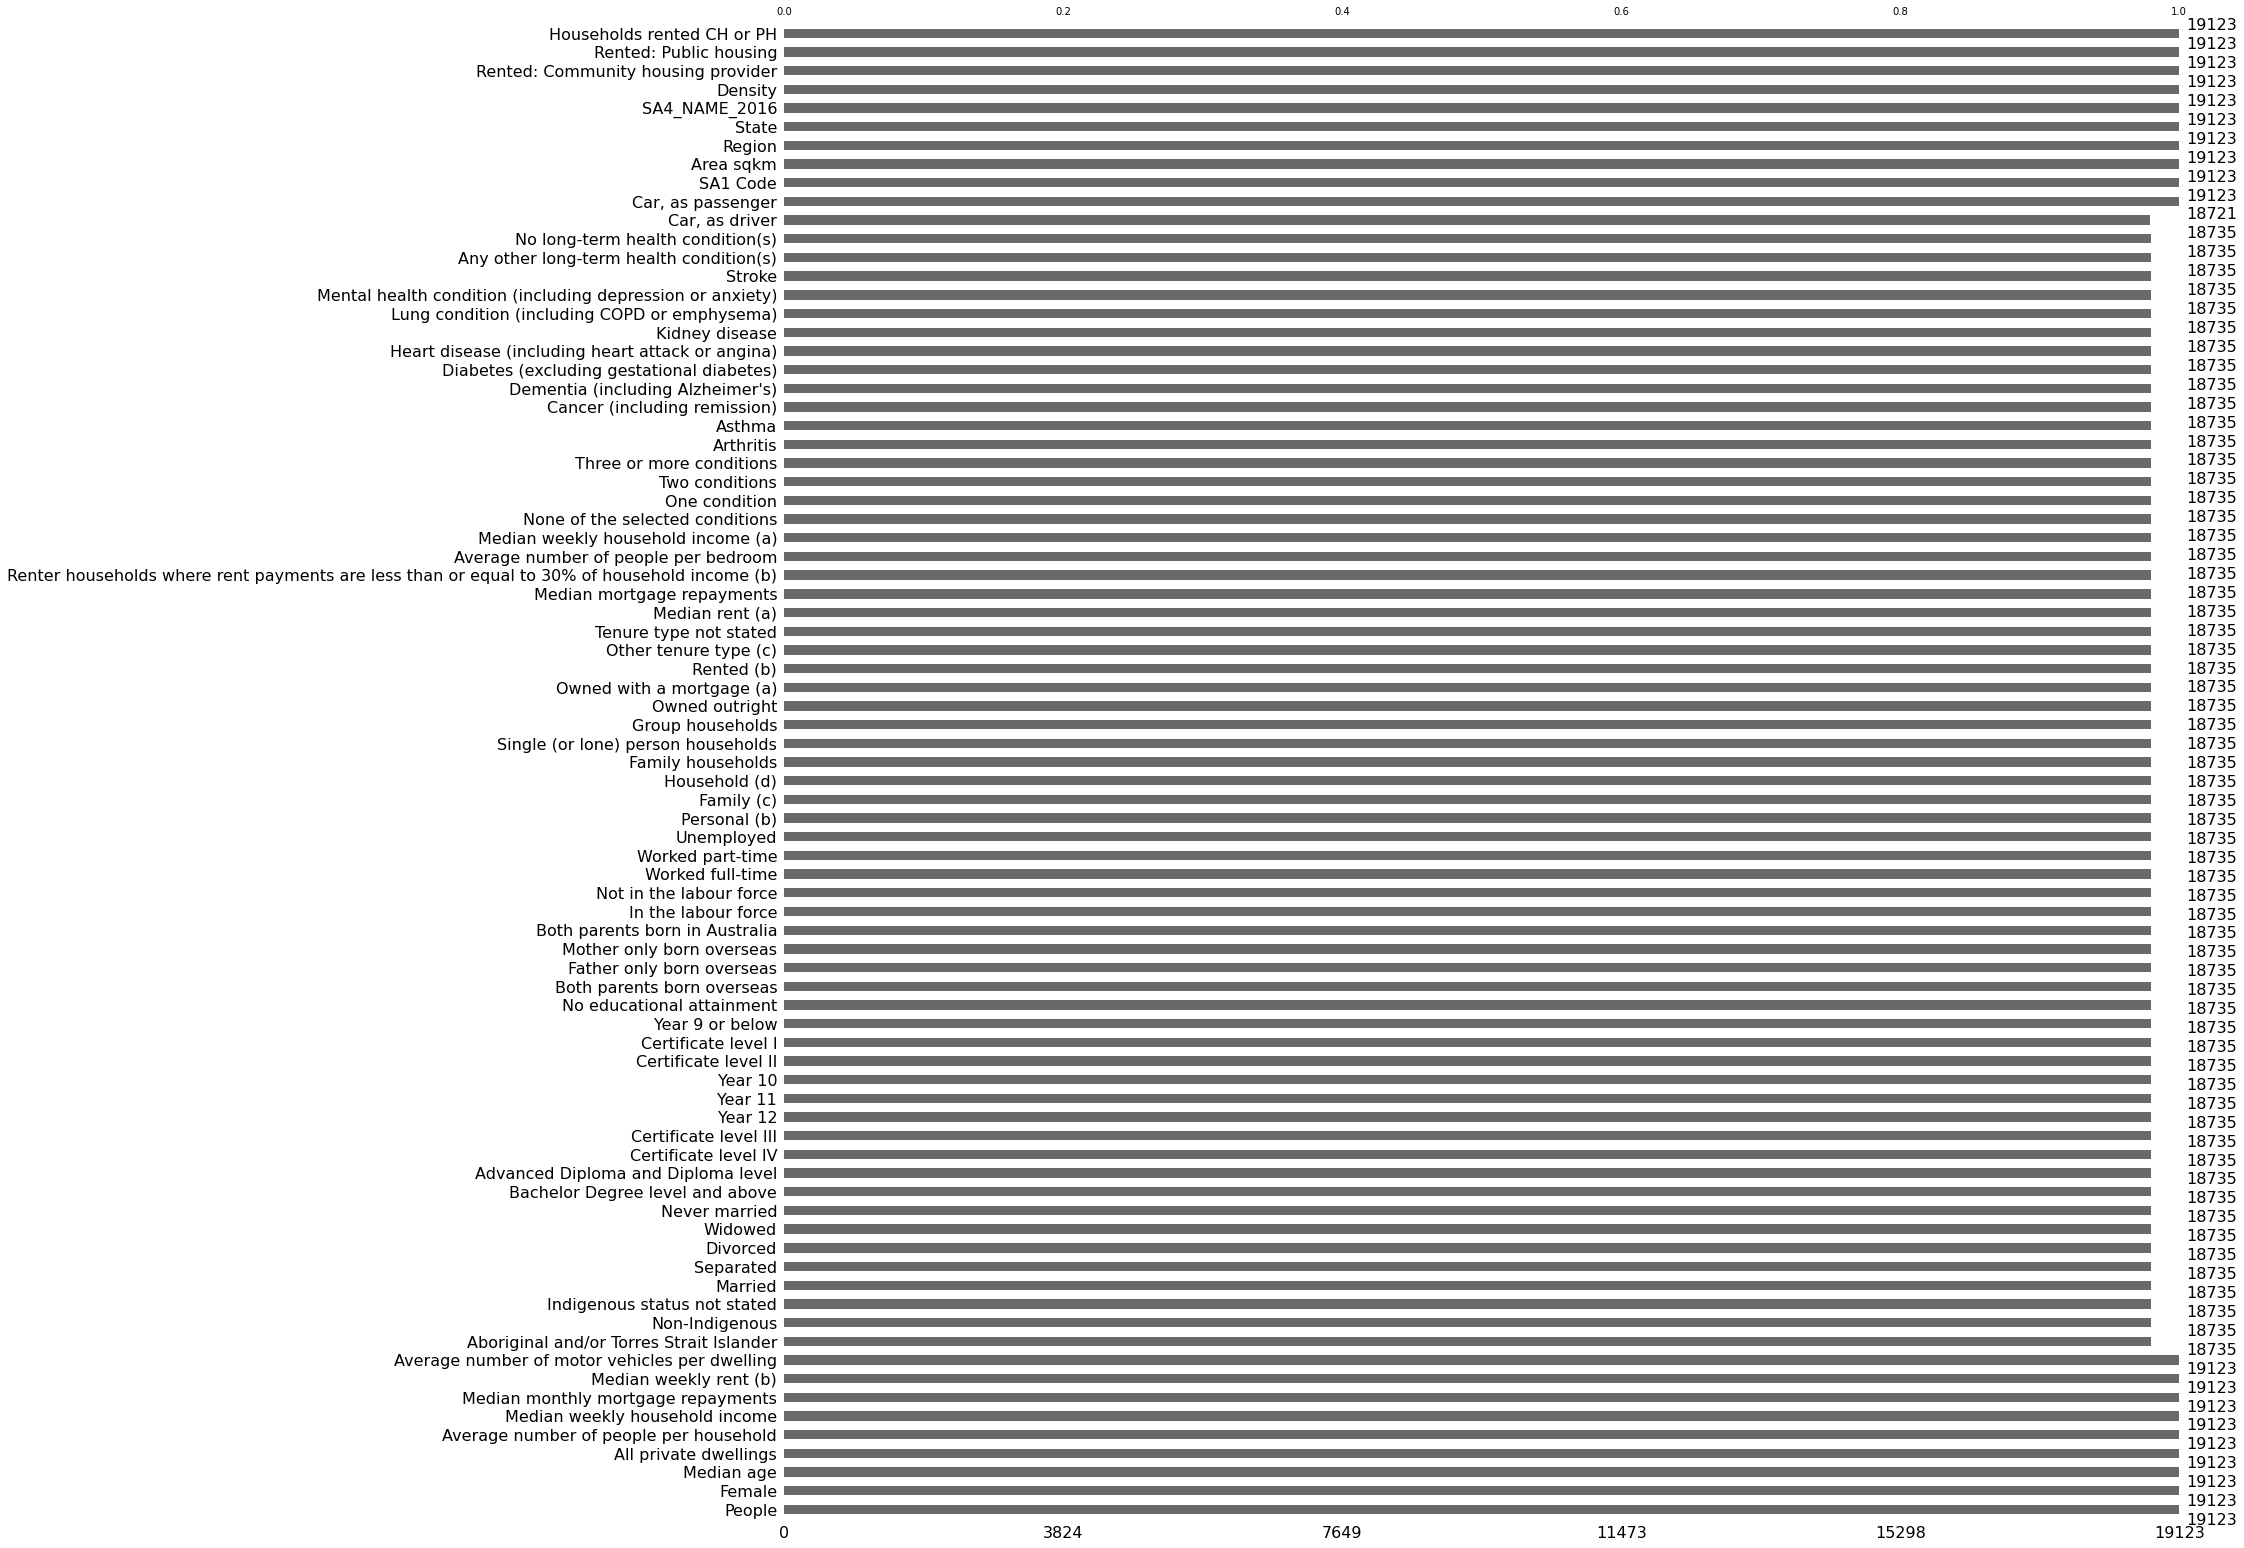

In [ ]:
# Imputing "Car, as passenger" feature with its median values values
df["Car, as passenger"] = df["Car, as passenger"].fillna(df["Car, as passenger"].mean())

# Visualise na values
print(msno.bar(df))


The plot still depicts existence of null values for some observations (zones). Our dependant value is also null, therefore the decision is to drop those rows.

In [ ]:
# Drop all observations that contains null Rent stress values
df = df.dropna(axis=0)



In [ ]:
# Display new shape
print(df.shape)


(18721, 80)


We will be working with 18721 ABS geografical zones (SA1) in our statistical learning algorithms

Axes(0.125,0.125;0.775x0.755)


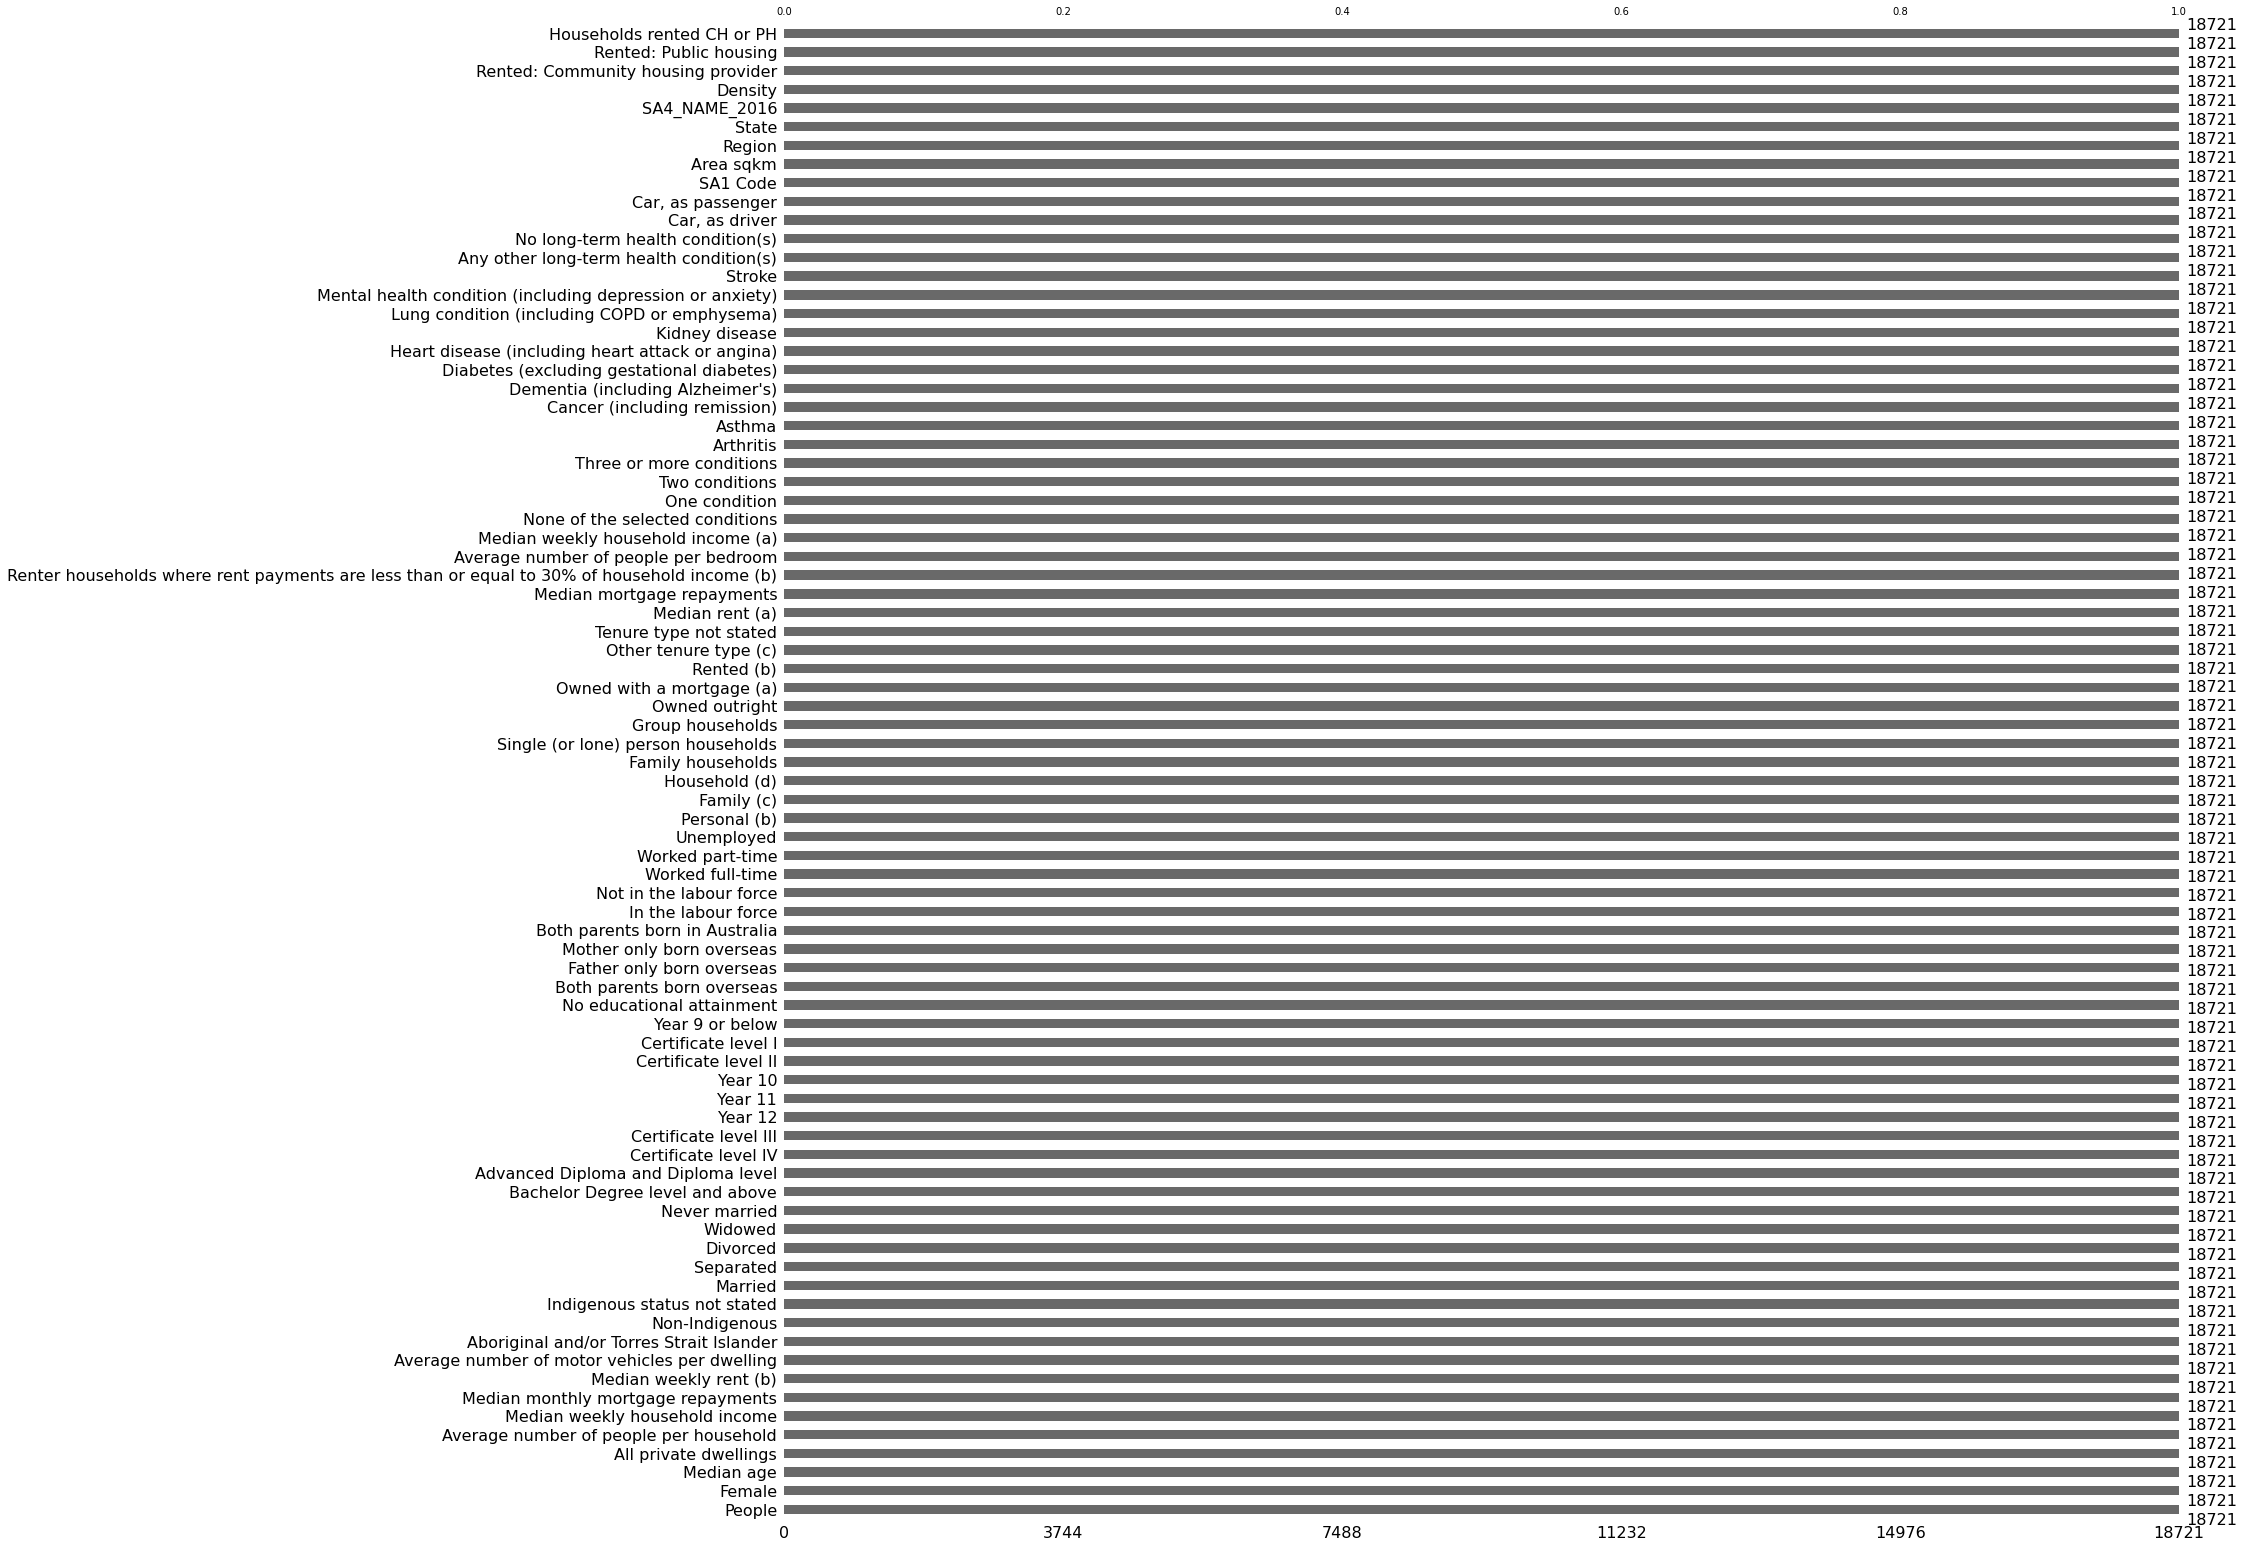

In [ ]:
# Re-check all null values were handled correctly
print(msno.bar(df))

# Transformations

### Renaming columns

In [ ]:
# Change names of the columns as all of them come from a scrapped dataset
df.columns = ['Num_people', 'Pct_female', 'Median_age', 'Num_households',
       'Avg_people_per_households', 'Median_weekly_household_income',
       'Median_monthly_mortgage_repayments',
       'Median_weekly_rent',
       'Avg_num_vehicles', 'Pct_indigenous', 'Pct_non_indigenous',
       'Pct_Non_stated_people', 'Pct_married', 'Pct_separated', 'Pct_divorced',
       'Pct_widowed', 'Pct_never_married', 'Pct_bachelor_above',
       'Pct_advanceddiploma_diploma', 'Pct_CertIV',
       'Pct_certIII', 'Year_12', 'Year_11', 'Year_10',
       'Pct_CertII', 'Pct_CertI', 'Pct_year_9_below',
       'Pct_no_educational_attainment', 'Both_parents_born_overseas',
       'Father_only_born_overseas', 'Mother_only_born_overseas',
       'Both_parents_born_ustralia', 'In_labour_force',
       'Not_in_labour_force', 'Worked_full_time', 'Worked_part_time',
       'Unemployed', 'Median_weekly_income_personal', 'Median_weekly_income_family',
       'Median_weekly_income_household', 'households_composition_family',
       'households_composition_single_lone_person',
       'households_composition_group', 'Tenure_type_owned_outright', 
       'Tenure_type_owned_mortgage',
       'Tenure_type_rented', 'Tenure_type_other', 'Tenure_type_not_stated',
       'Median_rent', 'Median_mortgage_repayments',
       'Household RAID',
       'Avg_people_per_bedroom_aboriginal',
       'Median_weekly_household_income_aboriginal', 'Health_no_condition',
       'Health_one_condition', 'Health_two_conditions', 'Health_three_more_conditions',
       'Health_Arthritis', 'Health_Asthma', 'Health_Cancer',
       'Health_Dementia',
       'Health_Diabetes',
       'Health_Heart_disease', 'Health_Kidney_disease',
       'Health_Lung', 'Health_Mental_condition', 'Health_Stroke',
       'Health_other_conditions', 'Health_no_longterm_conditions', 'Car_driver',
       'Car_passenger', 'SA1 Code', 'Area sqkm', 'Region', 'State',
       'SA4_NAME_2016', 'Density', 'Rented: Community housing provider',
       'Rented: Public housing', 'Households rented CH or PH']

### Pre-processing columns

In [ ]:
# Select columns that are data type: "Object"
df.select_dtypes(include=['object']).head()

,Pct_female,Median_weekly_household_income,Median_monthly_mortgage_repayments,Median_weekly_rent,Median_weekly_income_personal,Median_weekly_income_family,Median_weekly_income_household,Region,State,SA4_NAME_2016,Rented: Public housing
0,48.5%,"$1,818","$1,517",$425,$540,"$1,884","$1,818",Greater Sydney,New South Wales,Sydney - Blacktown,0
1,55.1%,"$1,671","$1,733",$435,$676,"$2,055","$1,671",Greater Sydney,New South Wales,Sydney - Blacktown,0
2,48.9%,"$2,017","$2,000",$370,$681,"$1,781","$2,017",Greater Sydney,New South Wales,Sydney - Blacktown,0
3,61.8%,"$2,399","$2,500",$400,$590,"$2,527","$2,399",Greater Sydney,New South Wales,Sydney - Blacktown,0
4,48.6%,"$2,394","$2,392",$530,$805,"$2,250","$2,394",Greater Sydney,New South Wales,Sydney - Blacktown,0


Percentage and incomes columns have symbols in their values. The most appropiate step would be to extract those symbols and convert it into float data types.

##### Pct_female

In [ ]:
# Removing % symbol and converting Pct_female to float
df["Pct_female"] = df["Pct_female"].str.replace("%","")
df['Pct_female'] = df['Pct_female'].astype(float)
print(df["Pct_female"])

0        48.5
1        55.1
2        48.9
3        61.8
4        48.6
         ... 
19118    51.6
19119    49.7
19120    46.6
19121    49.5
19122    55.6
Name: Pct_female, Length: 18721, dtype: float64


##### Income columns

In [ ]:
# Detect all columns with $

list_col_dollar_sign = []

for column in df.columns:
  if df[column].dtypes == "object":
      if df[column].str.contains("\$").any():
        list_col_dollar_sign.append(column)

list_col_dollar_sign

['Median_weekly_household_income',
 'Median_monthly_mortgage_repayments',
 'Median_weekly_rent',
 'Median_weekly_income_personal',
 'Median_weekly_income_family',
 'Median_weekly_income_household']

In [ ]:
# Of list_col_dollar_sign remove $, replace "," with "." and convert into float
for column in list_col_dollar_sign:
  df[column] = df[column].str.replace("$","", regex=False).str.replace(",",".", regex=False).astype(float)


In [ ]:
# Check all data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18721 entries, 0 to 19122
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Num_people                                 18721 non-null  float64
 1   Pct_female                                 18721 non-null  float64
 2   Median_age                                 18721 non-null  int64  
 3   Num_households                             18721 non-null  int64  
 4   Avg_people_per_households                  18721 non-null  float64
 5   Median_weekly_household_income             18721 non-null  float64
 6   Median_monthly_mortgage_repayments         18721 non-null  float64
 7   Median_weekly_rent                         18721 non-null  float64
 8   Avg_num_vehicles                           18721 non-null  float64
 9   Pct_indigenous                             18721 non-null  float64
 10  Pct_non_indigenous    

In [ ]:
# SA1 Code is the column that represents a unique identifier of each zone the proper data type would be "object"
df["SA1 Code"] = df["SA1 Code"].astype(str)


## Transforming from household quantity to percentage

Also, converting into the correct datatypes

In [ ]:
# Transforming 'Rented: Community housing provider', 'Rented: Public housing' and 'Households rented CH or PH" as percentages
for column in ph.columns[1:]:
  df[column] = df[column].astype(float)
  df[column] = df[column] / df['Num_households'] * 100 

### Transforming target variable

In [ ]:
# Describe the outcome variable
df["Household RAID"].describe()

count    18721.000000
mean        28.201912
std         27.361544
min          0.000000
25%         10.000000
50%         20.000000
75%         37.000000
max        552.000000
Name: Household RAID, dtype: float64

Household RAID is the target variable and displays the number of households that encountering rent stress.

The data needs to be transformed into percentage of total households.

In [ ]:
# Make target variable as percentage of total households in each zone
df["Household RAID"] = df['Household RAID'] / df['Num_households'] * 100

# Describe our outcome variable
print("Household RAID in percentage summary statistics")
df["Household RAID"].describe()

Household RAID in percentage summary statistics


count    18721.000000
mean        14.557637
std          9.700483
min          0.000000
25%          7.228916
50%         12.376238
75%         20.080321
max         79.279279
Name: Household RAID, dtype: float64

In [ ]:
# Calculate IQR
q3, q1 = np.percentile(df["Household RAID"].values, [75 ,25])
iqr = q3 - q1

print("IQR", round(iqr,2))

IQR 12.85


Although the Interquartile range is around 13%, the maximum value is 79%. 

This is a sign of skeweness.

## Range check and summary statistics

In [ ]:
# Run range quality check for minimum and maximum to all features that represent percentages

percentage_columns = []

for column in df.columns:
  if ("income" not in column) and ("Num" not in column) and ("Median" not in column) and (df[column].dtypes != "object"):
    percentage_columns.append(column)
    if df[column].max()>100:
      print(column, "higher than 100")
    if df[column].min()<0:
      print(column, "min than 0")


Area sqkm higher than 100
Density higher than 100


Only some features are beyond scale 0 to 100, and therefore do not represent percentages.

# Exploratory Data Analysis

In [ ]:
#Display the descriptive statistics of df
df.describe()

,Num_people,Pct_female,Median_age,Num_households,Avg_people_per_households,Median_weekly_household_income,Median_monthly_mortgage_repayments,Median_weekly_rent,Avg_num_vehicles,Pct_indigenous,...,Health_Stroke,Health_other_conditions,Health_no_longterm_conditions,Car_driver,Car_passenger,Area sqkm,Density,Rented: Community housing provider,Rented: Public housing,Households rented CH or PH
count,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000,...,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000,18721.000000
mean,428.151381,50.672117,40.895999,178.653224,2.661503,70.467714,26.194261,440.608870,1.829721,3.584541,...,0.886229,7.852759,60.457438,45.145655,5.406335,40.622625,4294.480957,0.677258,2.601959,3.366748
std,156.157431,3.127016,8.176944,77.957248,0.498867,231.595524,138.554537,167.539107,0.503877,4.937332,...,0.981945,2.836263,10.240279,16.448604,3.314614,650.036092,8882.206070,2.280302,7.456786,8.492386
min,104.000000,16.000000,18.000000,41.000000,1.000000,1.003000,0.000000,0.000000,0.100000,0.000000,...,0.000000,0.000000,7.800000,6.500000,0.800000,0.001800,0.005035,0.000000,0.000000,0.000000
25%,323.000000,48.900000,35.000000,127.000000,2.300000,1.541000,1.742000,340.000000,1.500000,0.300000,...,0.000000,6.100000,54.100000,33.000000,3.200000,0.096100,1136.192626,0.000000,0.000000,0.000000
50%,412.000000,50.700000,40.000000,166.000000,2.700000,2.050000,2.167000,430.000000,1.900000,2.000000,...,0.800000,7.600000,61.500000,45.000000,4.700000,0.164300,2590.673575,0.000000,0.000000,0.000000
75%,512.000000,52.400000,45.000000,212.000000,3.000000,2.687000,2.759000,545.000000,2.100000,5.000000,...,1.400000,9.200000,67.500000,58.000000,6.500000,0.365000,4262.820513,0.000000,1.181102,2.542373
max,3826.000000,70.800000,85.000000,2044.000000,4.300000,996.000000,999.000000,999.000000,3.900000,93.600000,...,11.700000,43.000000,91.300000,87.600000,35.700000,43298.925300,516666.666667,63.333333,81.188119,84.000000


### Distribution of target variable

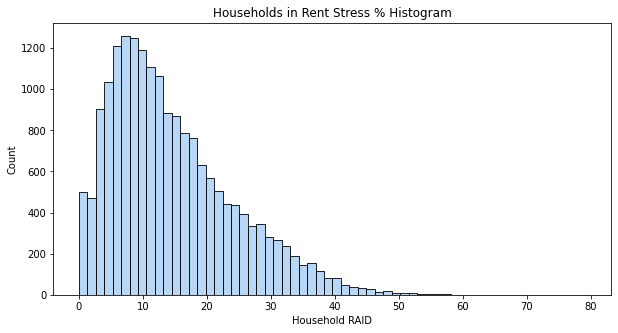

In [ ]:
# How is the target variable distributed?.
# Figure size setting
fig, ax = plt.subplots(figsize=(10, 5))

# Display histogram
sns.histplot(df['Household RAID'], bins=60, ax=ax)
plt.title("Households in Rent Stress % Histogram")
plt.show()
# The target variable is clearly skewed to the left

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


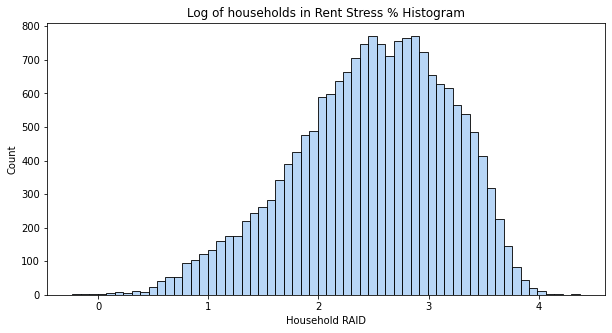

In [ ]:
# Figure size setting
fig, ax = plt.subplots(figsize=(10, 5))

# Display transformed variable (with logaritmic transformation)
sns.histplot(np.log(df['Household RAID']), bins=60, ax=ax)
plt.title("Log of households in Rent Stress % Histogram")
plt.show()

## Scatter plots

EDA for quantitative variables (x numerical and Rent Stress)

In [ ]:
# Create a table of pearson correlations for numerical values
correlation_series = df.corr().drop('Household RAID',axis=1).loc[['Household RAID'],:].T.sort_values(by='Household RAID', ascending=False)
print(correlation_series)

# Select top 10 highest correlation (positive or negative)
top_10_correlations = correlation_series.abs().sort_values(by='Household RAID', ascending=False).iloc[:10,]
top_10_correlations_columns = top_10_correlations.index
print(top_10_correlations_columns)


                               Household RAID
Tenure_type_rented                   0.901584
Pct_never_married                    0.611370
households_composition_group         0.516282
Density                              0.417562
Both_parents_born_overseas           0.389850
...                                       ...
Median_age                          -0.468684
households_composition_family       -0.474196
Pct_married                         -0.521757
Avg_num_vehicles                    -0.686631
Tenure_type_owned_outright          -0.733439

[75 rows x 1 columns]
Index(['Tenure_type_rented', 'Tenure_type_owned_outright', 'Avg_num_vehicles',
       'Pct_never_married', 'Pct_married', 'households_composition_group',
       'households_composition_family', 'Median_age',
       'Tenure_type_owned_mortgage', 'Density'],
      dtype='object')


Because we have many features in the dataset we will focus on analysing the 10 highest correlated ones. Are they showing linear relationship? Is that relationship strong?

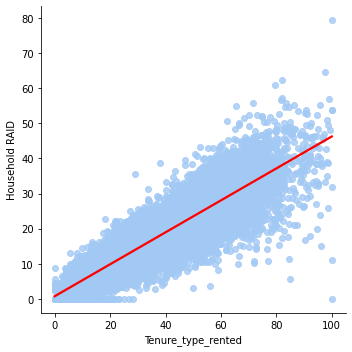

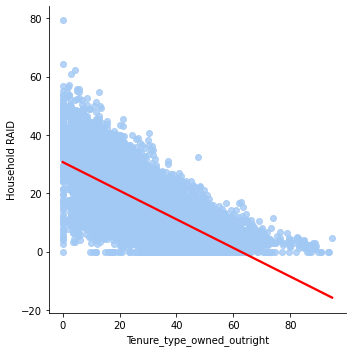

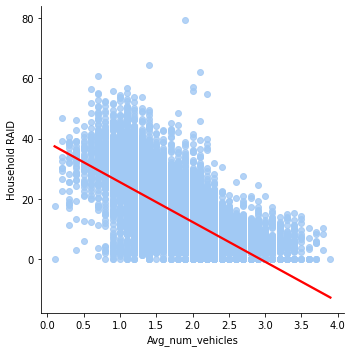

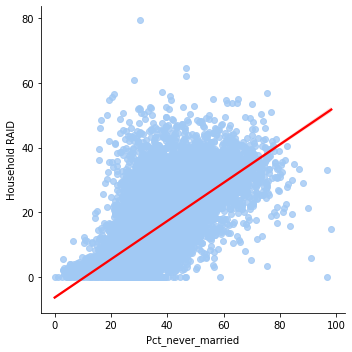

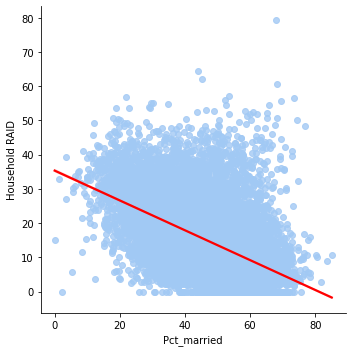

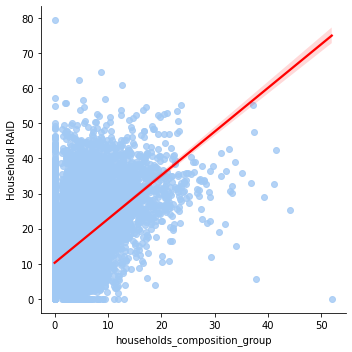

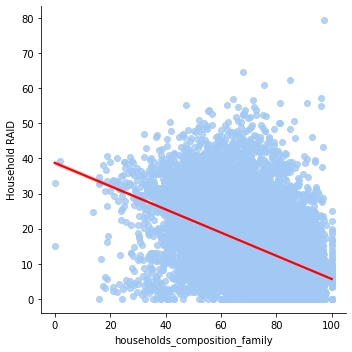

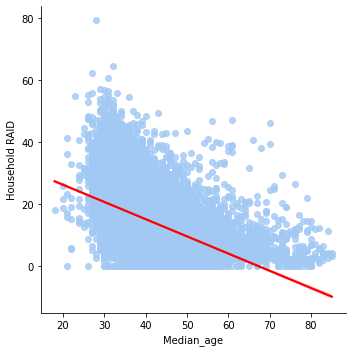

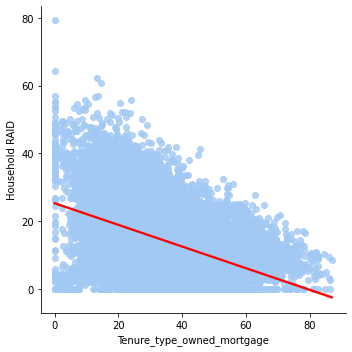

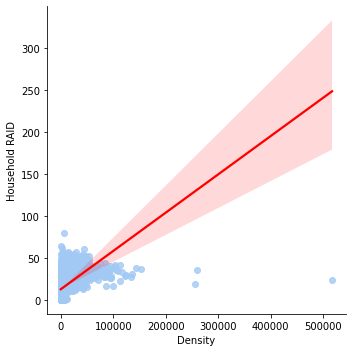

In [ ]:
# Plot scatter plot and regression lines 
for column in top_10_correlations.index:
  sns.lmplot(x=column, y='Household RAID',
           data=df,line_kws={'color': 'red'},markers=['o'])
plt.show()

The feature Density displays outliers, we want to know what the pattern and the line of least squares look like without them.

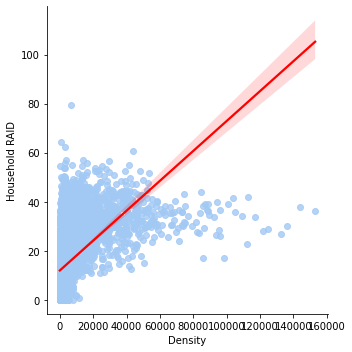

In [ ]:
# Scatter plot for density dropping outliers

df_density = df[df["Density"] < 200000]

sns.lmplot(x="Density", y='Household RAID',
           data=df_density,line_kws={'color': 'red'})
plt.show()

### Community housing and Public Housing feature

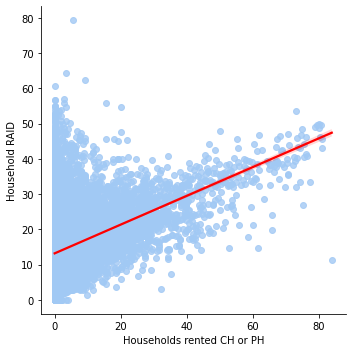

In [ ]:
# Scatter plot for 'Households rented CH or PH' 

sns.lmplot(x='Households rented CH or PH', y='Household RAID',
           data=df,line_kws={'color': 'red'})
plt.show()

## Rent stress and categorical variables

In [ ]:
# Subset all categorical columns
df.dtypes[df.dtypes == "object"]

SA1 Code         object
Region           object
State            object
SA4_NAME_2016    object
dtype: object

#### Region

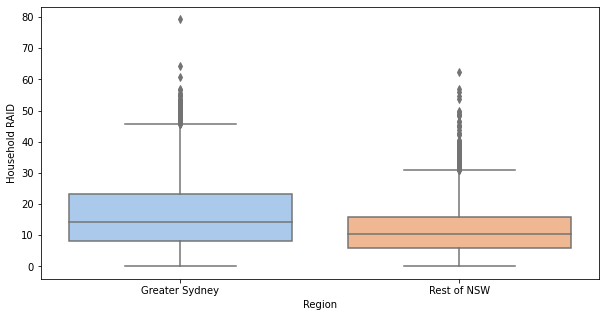

In [ ]:
# Visualisation rent stress variable and "Region" (Categorical)
# Figure size setting
fig, ax = plt.subplots(figsize=(10, 5))

# Box plot using seaborn
sns.boxplot(x="Region", y='Household RAID', data=df, ax=ax)
plt.show()

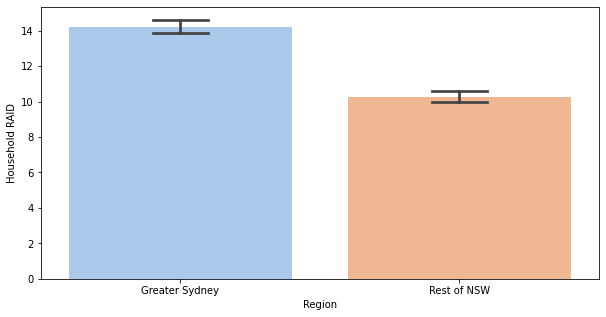

In [ ]:
# Figure size setting
fig, ax = plt.subplots(figsize=(10, 5))

# plot a bar chart
sns.barplot(x="Region", y='Household RAID', data=df, estimator=np.median, errorbar=("ci",99), capsize=.2, ax=ax)
plt.show()

All plots show difference in each Region category. It seems all the city area that is greater Sydney suffers a higher rent stress than the rest of New South Wales.

With 99% confidence, the difference in the median is statistically representative 

In [ ]:
# Calculate median for every Region
df.groupby("Region").median()["Household RAID"].round(2)

Region
Greater Sydney    14.21
Rest of NSW       10.29
Name: Household RAID, dtype: float64

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


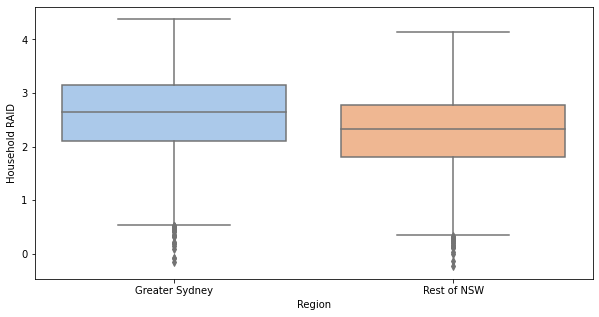

In [ ]:
# Try zone difference with transformed rent stress variable (log)

# Figure size setting
fig, ax = plt.subplots(figsize=(10, 5))

# Box plot using seaborn
sns.boxplot(x="Region", y=np.log(df['Household RAID']), data=df, ax=ax)
plt.show()

Region would possibly be a good predictor of rent stress in a statistical learning model.


### SA4 regions

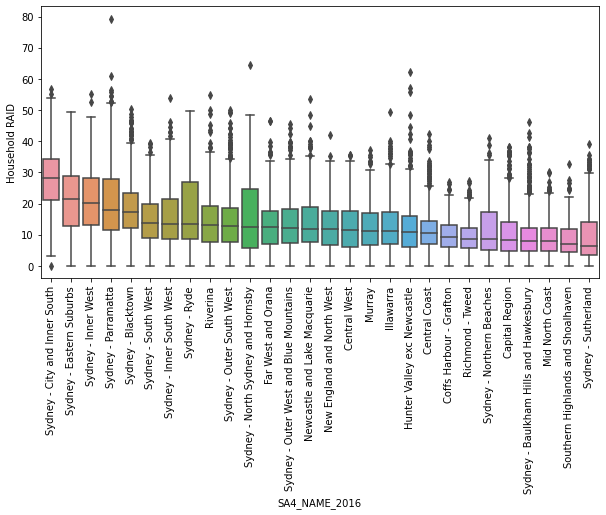

In [ ]:
# Figure size setting
fig, ax = plt.subplots(figsize=(10, 5))

# Find the order
order_list = df.groupby(by=["SA4_NAME_2016"])['Household RAID'].median().sort_values(ascending=False).index

# Box plot using seaborn
sns.boxplot(x="SA4_NAME_2016", y='Household RAID', data=df, ax=ax, order=order_list)

# Display labels in 90 degrees
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# Display plot
plt.show()

Sydney city is the zone that presents the highest rent stress of all.

In general, zones that are near Sydney city incur more rent stress that others.

## Scatter plots for all numerical variables against RAID

In [ ]:
# Create a list to subset dataframe of numerical columns every 5 columns
list_iloc = []
for i, number in enumerate(range(0,75,5)):
  #print(number)
  if number == 0:
    list_iloc.append([0,number+5])
  elif number == 70:
    list_iloc.append([number-1,number+3])
  else:
    list_iloc.append([number-1,number+4])

# Create a list of numerical columns 
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['Num_people', 'Pct_female', 'Median_age', 'Num_households',
       'Avg_people_per_households', 'Median_weekly_household_income',
       'Median_monthly_mortgage_repayments', 'Median_weekly_rent',
       'Avg_num_vehicles', 'Pct_indigenous', 'Pct_non_indigenous',
       'Pct_Non_stated_people', 'Pct_married', 'Pct_separated', 'Pct_divorced',
       'Pct_widowed', 'Pct_never_married', 'Pct_bachelor_above',
       'Pct_advanceddiploma_diploma', 'Pct_CertIV', 'Pct_certIII', 'Year_12',
       'Year_11', 'Year_10', 'Pct_CertII', 'Pct_CertI', 'Pct_year_9_below',
       'Pct_no_educational_attainment', 'Both_parents_born_overseas',
       'Father_only_born_overseas', 'Mother_only_born_overseas',
       'Both_parents_born_ustralia', 'In_labour_force', 'Not_in_labour_force',
       'Worked_full_time', 'Worked_part_time', 'Unemployed',
       'Median_weekly_income_personal', 'Median_weekly_income_family',
       'Median_weekly_income_household', 'households_composition_family',
       'ho

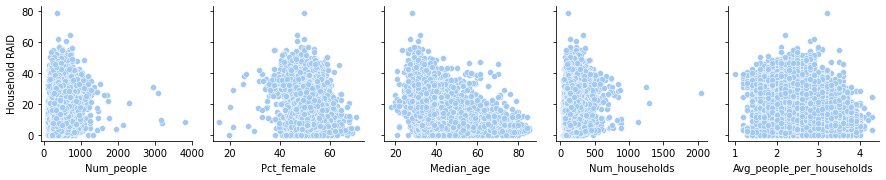

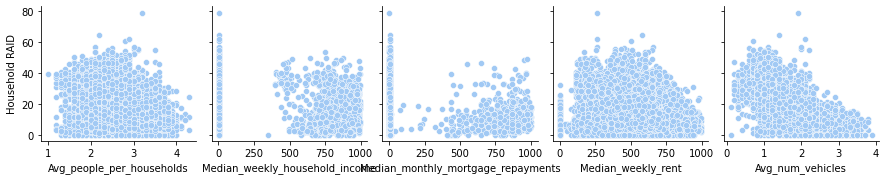

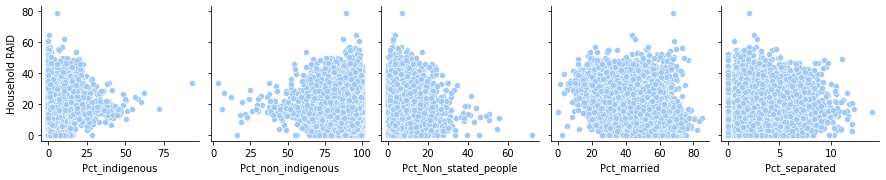

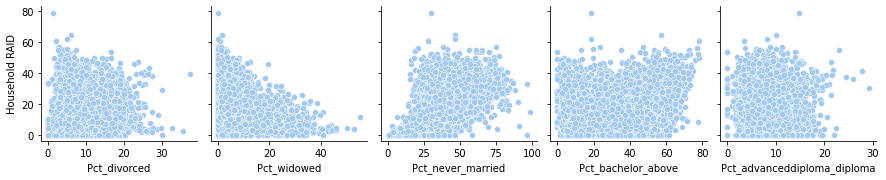

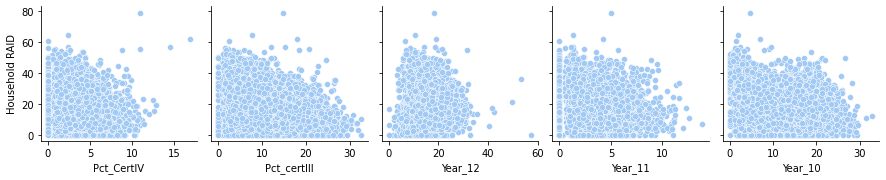

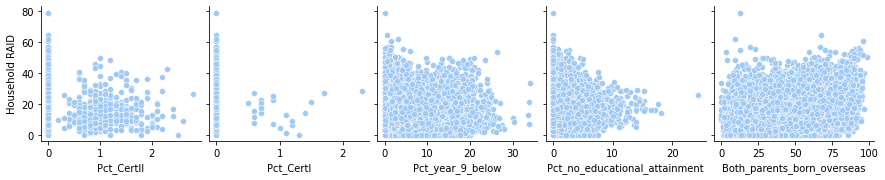

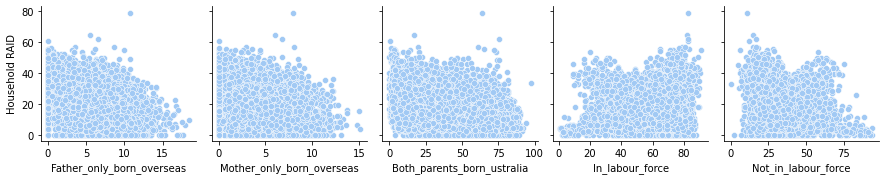

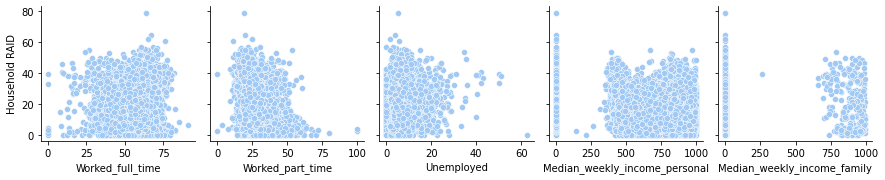

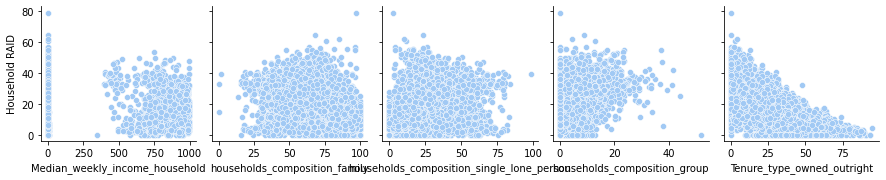

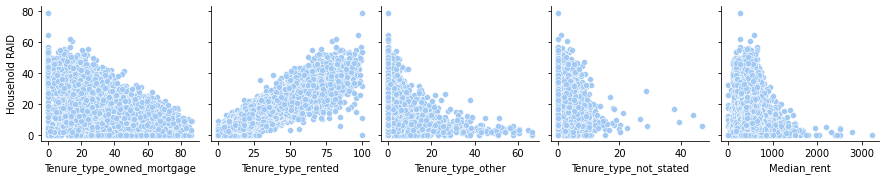

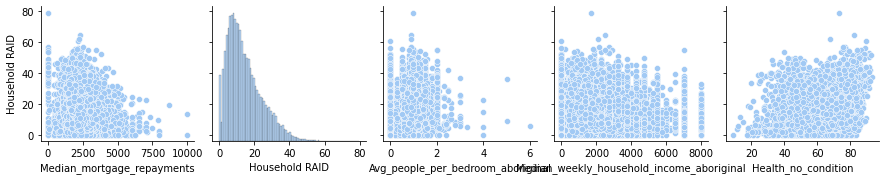

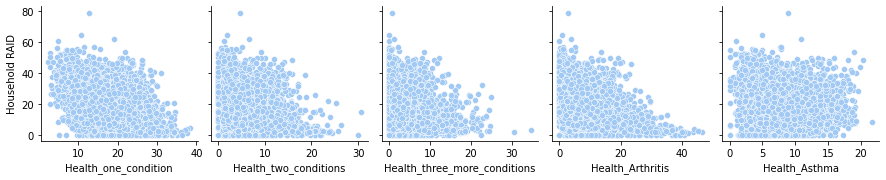

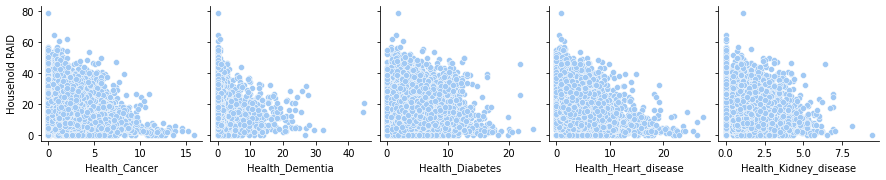

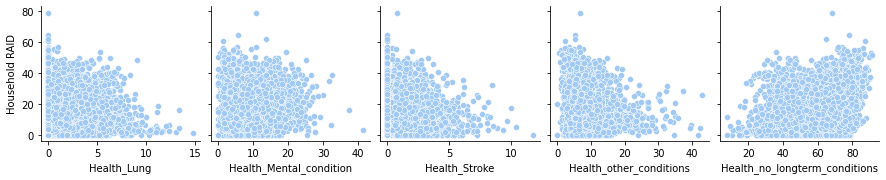

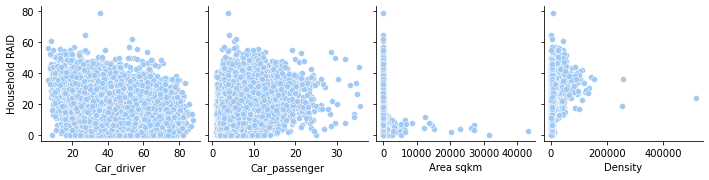

In [ ]:
# Display all numerical variables as x and Household RAID as y in scatter plots
for positions in list_iloc:
  sns.pairplot(data=df,y_vars=['Household RAID'],x_vars=df[numerical_columns].iloc[:,positions[0]:positions[1]])
  plt.show()

We are not detecting any other insight from visualisations. As next step we would be using multiple variable algorithms to start analysing the complete picture.

End of Stage 1